## Triangle Algorithm

This notebook implements the algorithm to plot the points of the "perpindicular stepping algorithm" I developed to test my hypothesis.  

In [24]:
%matplotlib qt

In [2]:
# start by defining basic functions for general use
#%matplotlib qt
def findFunc(point1, point2):
    """find the linear function that fits two points"""
    m = ((point2[1] - point1[1]) / (point2[0] - point1[0]))
    b = (((point2[0] * point1[1]) - (point1[0] * point2[1])) / (point2[0] - point1 [0]))
    return m, b

In [3]:
def midpoint(pair1, pair2):
    x = (pair1[0] + pair2[0])/2
    y = (pair1[1] + pair2[1])/2
    return x, y

In [4]:
def pFunc(m):
    """find function perpindicular"""
    mperp = (-1/m)
    return mperp

In [5]:
def newB(m, point):
    """find adjusted b"""
    b = (point[1] - (m * point[0]))
    return b

In [6]:
import math

def dist(point1, point2):
    """find the distance between the two passed points"""
    dist = math.sqrt((pow((point2[0] - point1[0]), 2)) + ((pow((point2[1] - point1[1]), 2))))
    return dist

In [7]:
def inter(mb1, mb2):
    """find the point of intersection between two functions"""
    x = ((mb2[1] - mb1[1]) / (mb1[0] - mb2[0]))
    y = ((mb1[0] * x) + mb1[1])
    return x, y

In [8]:
def plot(dpi):
    fig, ax=plt.subplots(dpi=dpi)
    #ax.plot([2,4,1,5], label="Label")
    ax.legend()

Now that we have the preliminary functions out of the way we will write the main algorithm.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def drawTriangle(n, startPoint, P1, P2, P3):
    # current point to draw from
    current_point = startPoint
    visited_points = [startPoint]
    
    # define lines of triangle.  Of form [m, b]
    # for now just assume bottom line is on x axis so don't have to draw it.
    l1 = findFunc(P1, P2)
    l2 = findFunc(P2, P3)
    #l3 = findFunc(P3, P1)
    
    # define perpindicular functions.  Returns m'
    lp1 = pFunc(l1[0])
    lp2 = pFunc(l2[0])
    #lp3 = pfunc(l3[0]) # inverse of y = 0 is x = 0

    
    # start painting loop
    for i in range(0, n):
        
        lOne = [lp1, newB(lp1, current_point)]
        inter1 = inter(l1, lOne)
        
        lTwo = [lp2, newB(lp2, current_point)]
        inter2 = inter(l2, lTwo)
        
        #lThree = [lp3, newB(lp3, current_point)]
        #inter3 = inter(l3, lThree)
        
        # this corresponds to the botton line which lies along the x axis so need a different function rule for it.  
        inter3 = [current_point[0], 0]
        
        
        dist1 = dist(current_point, inter1)
        dist2 = dist(current_point, inter2)
        dist3 = dist(current_point, inter3)
        
        smallest = max([dist1, dist2, dist3])
        
        # NEED TO IMPLEMENT FUNCTIONING RANDOM CHOICE
        # if two distances are the same pick a random one to follow
        if(dist1 == dist2):
            current_point = random.choice([inter1, inter2])
            visited_points.append(current_point)
        if(dist1 == dist3):
            current_point = random.choice([inter1, inter3])
            visited_points.append(current_point)
        if(dist2 == dist3):
            current_point = random.choice([inter2, inter3])
            visited_points.append(current_point)
        
        # move to new point
        if(smallest == dist1):
            current_point = inter1
            visited_points.append(current_point)
        if(smallest == dist2):
            current_point = inter2
            visited_points.append(current_point)
        if(smallest == dist3):
            current_point = inter3
            visited_points.append(current_point)
    
    x = []
    for i in visited_points[50:]:
        x.append(i[0])
    
    y = []
    for i in visited_points[50:]:
        y.append(i[1])
        
    xp = [P1[0], P2[0], P3[0], P1[0]]
    yp = [P1[1], P2[1], P3[1], P1[1]]
    
    fig, ax = plt.subplots(dpi=120)
    ax.plot(xp, yp)
    ax.plot(x, y)
    ax.scatter(x, y)
    
    plt.xlim(-.5, (P3[0]+.5))
    plt.ylim(-.5, (P2[1]+.5))
    plt.gca().set_aspect('equal', adjustable='box')
    #plt.plot(xp, yp)
    #plt.plot(x, y)
    #plt.scatter(x, y)
    plt.show()

    return current_point, visited_points

In [19]:
def return_points(angle1, angle2, right_point):
    """anlge1 is top angle, angle2 is right angle.
    The left point is on origin, the right point is defined by you, the top point is found computationally"""
    
    #find left angle
    angle3 = (180 - angle1) - angle2
    
    #define left line
    m1 = math.tan(math.radians(angle3))
    b1 = 0
    mb1 = [m1, b1]
    
    #define right line
    m2 = -(math.tan(math.radians(angle2)))
    b2 = newB(m2, right_point)
    mb2 = [m2, b2]
    
    # find out when the line defined by left and right side intersect to get your final point.
    pointT = inter(mb2, mb1)
    
    return (0, 0), pointT, right_point

In [20]:
rp = return_points(90, 45, [4,0])

In [26]:
# isosceles obtuse
current_point1, visited_points1 = drawTriangle(100, [2, 0], rp[0], rp[1], rp[2])

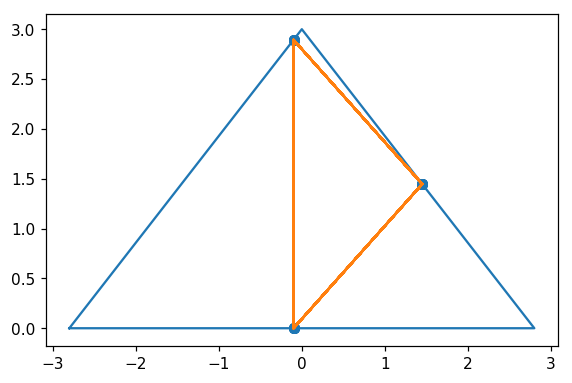

In [20]:
# isosceles accute

# weired, notice how you can start the drawing OUTSIDE of the triangle and as long as follow the rules still end with the same thing.

current_point2, visited_points2 = drawTriangle(100, [3, 4], [-2.8, 0], [0, 3], [2.8, 0])

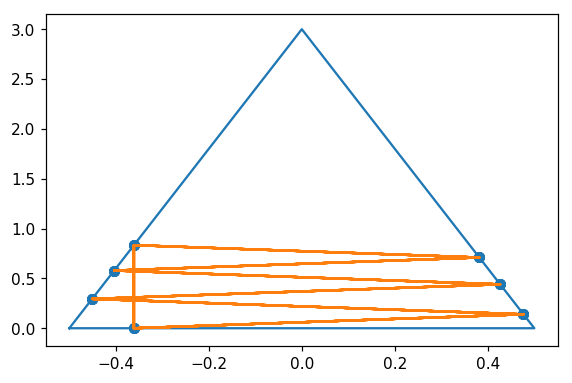

In [19]:
# isosceles accute
current_point2, visited_points2 = drawTriangle(100, [0, 0], [-.5, 0], [0, 3], [.5, 0])

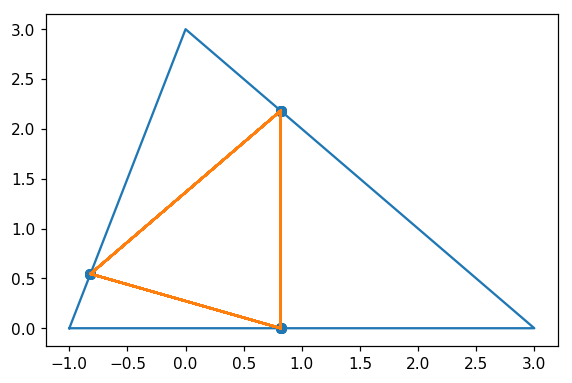

In [21]:
# scalene accute
current_point3, visited_points3 = drawTriangle(100, [2.5, 0], [-1, 0], [0, 3], [3, 0])

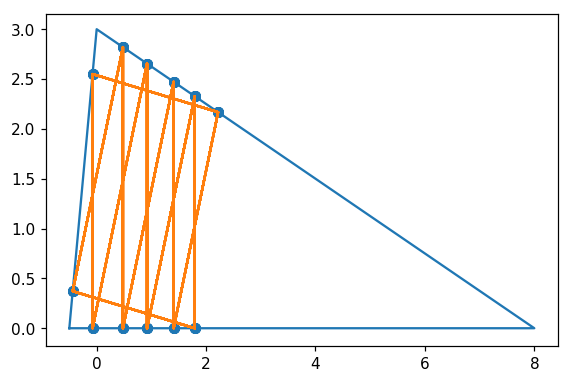

In [27]:
current_point5, visited_points5 = drawTriangle(150, [0, 0], [-.5, 0], [0, 3], [8, 0])

Note how these inside triangles **are the smallest possible similar triangles that can fit inside the outer triangle and touch all three outer edges** -- is a hypothesis I have.

## Running tests

#### Convergence Tests
Below we will try to determine if the process does converge or not.

As can be seen, pulling from about halfway through and the last point the points were all the same so it does seem to converge in a finite number of steps.

#### Distance, Similarity Test

In [14]:
fpoint1 = visited_points2[98]
fpoint2 = visited_points2[99]
fpoint3 = visited_points2[100]

pnt1 = [-2, 0]
pnt2 = [0, 3]
pnt3 = [2, 0]

bdist1 = dist(pnt1, pnt2)
bdist2 = dist(pnt2, pnt3)
bdist3 = dist(pnt3, pnt1)

idist1 = dist(fpoint3, fpoint1)
idist2 = dist(fpoint2, fpoint3)
idist3 = dist(fpoint1, fpoint2)

print("Outer ratio: ", (bdist1/bdist3), " Inner ratio: ", (idist1/idist2))

Outer ratio:  0.9013878188659973  Inner ratio:  0.9013878188659975


As you can see, my hypothesis that the inner and outer triangles are similar appears to be correct.  The side length ratios are exactly the same except for the very last decimal point which may be attributtal to computer float error.

## Finding function to find length of sides and points of rest of interior triangle

Below I will start by attempting to find the side lengths of the inner triangle with an exact function that may come out of the patterns. 

In [22]:
print("The side lengths of the outer triangle are: ", bdist1, " ", bdist2, " ", bdist3, " for left, right, and bottom, respectively")

print("\nThe corresponding side lengths of the inner triangle are: ", idist1, " ", idist3, " ", idist2, "\n\n")

The side lengths of the outer triangle are:  3.605551275463989   3.605551275463989   4.0  for left, right, and bottom, respectively

The corresponding side lengths of the inner triangle are:  2.0603150145508513   2.0603150145508513   2.2857142857142856 




As you can see, the inner triangle is similar to the outer triangle as we had shown previousely.

Now we will find the angle of the the altitude between the two congruent edges.  We will use these rules from the law of cosines to find the inner angles of the triangle.
$$
A = arccos(\frac{b^2+c^2-a^2}{2bc})
$$

$$
B = arccos(\frac{a^2+c^2-b^2}{2ac})
$$

$$
C = 180 - A - B
$$

Where $A$, $B$, $C$ are the angles, and $a$, $b$, $c$ are the length of the sides opposite those angles.  Now we can apply these functions to find the angles of the outer triangle in degrees.

The top angle evaluates to about $67.3801351$ degrees.  The two side angles evaluate to about $56.3099325$ degrees.

Note that you can approximate the each side of the inner angle by multiplying its corresponding outer side length by (1/(e-1)).

**Even better approximation/answer**.  Each side length of the inner similar triangle is equal to $sin(A) * a * \phi$ where $A$ is the altitude angle, $a$ is the corresponding side length, and $\phi$ is the golden ratio.  This means that it is very possible that this product is exact when $len(\phi) = \infty$.  Another important note is that the side lengths and angles are not exact, the angles themselves that were plugged in have many more digits to them that the program I used did not spit out, so for at least the first iscoceles triangle that would have made it even more accurate.

## Trying approximation on scalene triangle

It worked on the isoceles, now we try on the scalene.

In [10]:
phi = (1.61803398874989484820458683436563811772030917980576286213544862270526046281890\
244970720720418939113748475408807538689175212663386222353693179318006076672635\
443338908659593958290563832266131992829026788067520876689250171169620703222104\
321626954862629631361443814975870122034080588795445474924618569536486444924104\
432077134494704956584678850987433944221254487706647809158846074998871240076521\
705751797883416625624940758906970400028121042762177111777805315317141011704666\
599146697987317613560067087480710131795236894275219484353056783002287856997829\
778347845878228911097625003026961561700250464338243776486102838312683303724292\
675263116533924731671112115881863851331620384005222165791286675294654906811317\
159934323597349498509040947621322298101726107059611645629909816290555208524790\
352406020172799747175342777592778625619432082750513121815628551222480939471234\
145170223735805772786160086883829523045926478780178899219902707769038953219681\
986151437803149974110692608867429622675756052317277752035361393621076738937645\
560606059216589466759551900400555908950229530942312482355212212415444006470340\
565734797663972394949946584578873039623090375033993856210242369025138680414577\
995698122445747178034173126453220416397232134044449487302315417676893752103068\
737880344170093954409627955898678723209512426893557309704509595684401755519881\
921802064052905518934947592600734852282101088194644544222318891319294689622002\
301443770269923007803085261180754519288770502109684249362713592518760777884665\
836150238913493333122310533923213624319263728910670503399282265263556209029798\
642472759772565508615487543574826471814145127000602389016207773224499435308899\
909501680328112194320481964387675863314798571911397815397807476150772211750826\
945863932045652098969855567814106968372884058746103378105444390943683583581381\
131168993855576975484149144534150912954070050194775486163075422641729394680367\
319805861833918328599130396072014455950449779212076124785645916160837059498786\
006970189409886400764436170933417270919143365013715766011480381430626238051432\
117348151005590134561011800790506381421527093085880928757034505078081454588199\
063361298279814117453392731208092897279222132980642946878242748740174505540677\
875708323731097591511776297844328474790817651809778726841611763250386121129143\
683437670235037111633072586988325871033632223810980901211019899176841491751233\
134015273384383723450093478604979294599158220125810459823092552872124137043614\
910205471855496118087642657651106054588147560443178479858453973128630162544876\
114852021706440411166076695059775783257039511087823082710647893902111569103927\
683845386333321565829659773103436032322545743637204124406408882673758433953679\
593123221343732099574988946995656473600729599983912881031974263125179714143201\
231127955189477817269141589117799195648125580018455065632952859859100090862180)

fpoint1 = visited_points3[98]
fpoint2 = visited_points3[99]
fpoint3 = visited_points3[100]

pnt1 = [-1, 0]
pnt2 = [0, 3]
pnt3 = [3, 0]

bdist1 = dist(pnt1, pnt2)
bdist2 = dist(pnt2, pnt3)
bdist3 = dist(pnt3, pnt1)

idist1 = dist(fpoint3, fpoint1)
idist2 = dist(fpoint2, fpoint3)
idist3 = dist(fpoint1, fpoint2)

print("The side lengths of the outer triangle are: ", bdist1, " ", bdist2, " ", bdist3, " for left, right, and bottom, respectively")

print("\nThe corresponding side lengths of the inner triangle are: ", idist1, " ", idist3, " ", idist2, "\n\n")

NameError: name 'visited_points3' is not defined

Angles:
* A = 71.5650512 °
* B = 45 °
* C = 63.4349488 °

In [10]:
(math.sin(math.radians(63.4349488)))*(4.242640687119285)*phi

2.345274090549127

# Adjusting angles to test error change


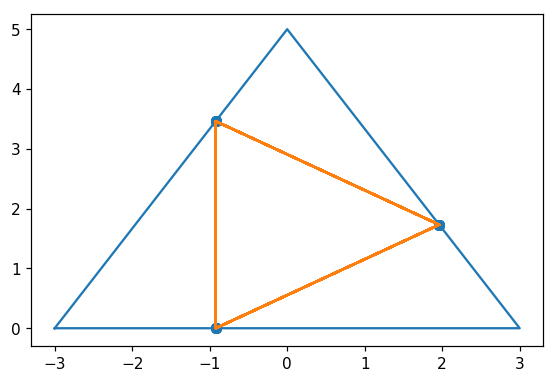

The side lengths of the outer triangle are:  5.830951894845301   5.830951894845301   6.0  for left, right, and bottom, respectively

The corresponding side lengths of the inner triangle are:  3.461538461538461   3.3640107085645967   3.3640107085645967

The side ratios for the outer are:  0.9718253158075502  and for inner are:  0.9718253158075504


In [22]:
current_point4, visited_points4 = drawTriangle(100, [0, 0], [-3, 0], [0, 5], [3, 0])

fpoint1 = visited_points4[98]
fpoint2 = visited_points4[99]
fpoint3 = visited_points4[100]

pnt1 = [-3, 0]
pnt2 = [0, 5]
pnt3 = [3, 0]

bdist1 = dist(pnt1, pnt2)
bdist2 = dist(pnt2, pnt3)
bdist3 = dist(pnt3, pnt1)

idist1 = dist(fpoint3, fpoint1)
idist2 = dist(fpoint2, fpoint3)
idist3 = dist(fpoint1, fpoint2)

print("The side lengths of the outer triangle are: ", bdist1, " ", bdist2, " ", bdist3, " for left, right, and bottom, respectively")

print("\nThe corresponding side lengths of the inner triangle are: ", idist1, " ", idist3, " ", idist2)

print("\nThe side ratios for the outer are: ", (bdist1/bdist3), " and for inner are: ", (idist3/idist1))

In [13]:
((math.sin(math.radians(61.9275131)))*(6))/(phi - (1-(math.sin(math.radians(61.9275131)))))

3.528501576620925

As you can see, the the function $sin(A)*a/b/c*\phi$ is a decent approximation of the side lengths of the inner triangle.  This worked for both the above scalene and isosceles triangles.  Below I will try it on a couple more different ones.

## Scaling with Isosceles triangles

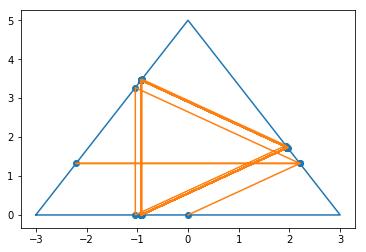

The side lengths of the outer triangle are:  5.830951894845301   5.830951894845301   6.0  for left, right, and bottom, respectively

The corresponding side lengths of the inner triangle are:  3.461538461538461   3.3640107085645967   3.3640107085645967

The side ratios for the outer are:  0.9718253158075502  and for inner are:  0.9718253158075504


In [18]:
# make different shaped triangle
current_point4, visited_points4 = drawTriangle(100, [0, 0], [-3, 0], [0, 5], [3, 0])

fpoint1 = visited_points4[98]
fpoint2 = visited_points4[99]
fpoint3 = visited_points4[100]

pnt1 = [-3, 0]
pnt2 = [0, 5]
pnt3 = [3, 0]

bdist1 = dist(pnt1, pnt2)
bdist2 = dist(pnt2, pnt3)
bdist3 = dist(pnt3, pnt1)

idist1 = dist(fpoint3, fpoint1)
idist2 = dist(fpoint2, fpoint3)
idist3 = dist(fpoint1, fpoint2)

print("The side lengths of the outer triangle are: ", bdist1, " ", bdist2, " ", bdist3, " for left, right, and bottom, respectively")

print("\nThe corresponding side lengths of the inner triangle are: ", idist1, " ", idist3, " ", idist2)

print("\nThe side ratios for the outer are: ", (bdist1/bdist3), " and for inner are: ", (idist3/idist1))

That list decimal place of error for triangle similarity can be attributed to computer error most likely.

Angles:
* A = 59.0362435 °
* B = 59.0362435 °
* C = 61.9275131 °

More testing of approximation algorithm.

In [23]:
((math.sin(math.radians(61.9275131)))*(6))/(phi - (1 - (math.sin(math.radians(61.9275131)))))

3.528501576620925

In [21]:
((math.sin(math.radians(61.9275131)))*(6))/(phi)

3.2719446474149336

In [79]:
(((math.sin(math.radians(61.9275131)))*(6))/(phi))*c, ((((math.sin(math.radians(61.9275131)))*(6)) / (((math.sin(math.radians(61.9275131)) * (math.cos(math.radians(59.0362435))))/phi)+1)))

(3.4615384615384612, 4.13419829085224)

In [73]:
phi-(c-1)

1.5600886887664982

In [61]:
math.sin(math.radians(61.9275131)) / phi

0.545324107902489

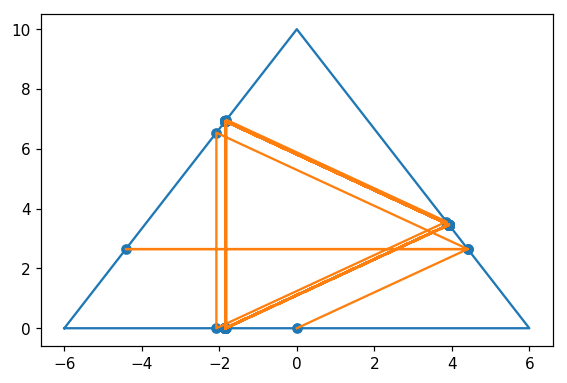

The side lengths of the outer triangle are:  11.661903789690601   11.661903789690601   12.0  for left, right, and bottom, respectively

The corresponding side lengths of the inner triangle are:  6.923076923076922   6.728021417129193   6.728021417129193

The side ratios for the outer are:  0.9718253158075502  and for inner are:  0.9718253158075504


In [14]:
current_point4, visited_points4 = drawTriangle(100, [0, 0], [-6, 0], [0, 10], [6, 0])

fpoint1 = visited_points4[98]
fpoint2 = visited_points4[99]
fpoint3 = visited_points4[100]

pnt1 = [-6, 0]
pnt2 = [0, 10]
pnt3 = [6, 0]

bdist1 = dist(pnt1, pnt2)
bdist2 = dist(pnt2, pnt3)
bdist3 = dist(pnt3, pnt1)

idist1 = dist(fpoint3, fpoint1)
idist2 = dist(fpoint2, fpoint3)
idist3 = dist(fpoint1, fpoint2)

print("The side lengths of the outer triangle are: ", bdist1, " ", bdist2, " ", bdist3, " for left, right, and bottom, respectively")

print("\nThe corresponding side lengths of the inner triangle are: ", idist1, " ", idist3, " ", idist2)

print("\nThe side ratios for the outer are: ", (bdist1/bdist3), " and for inner are: ", (idist3/idist1))

In [19]:
((math.sin(math.radians(61.9275131)))*(12))/(phi - (1 - (math.sin(math.radians(61.9275131)))))

6.543889294829867

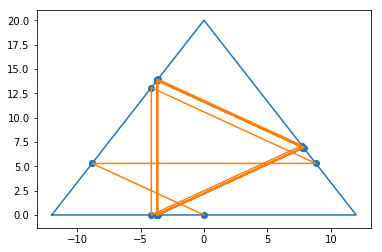

The side lengths of the outer triangle are:  23.323807579381203   23.323807579381203   24.0  for left, right, and bottom, respectively

The corresponding side lengths of the inner triangle are:  13.846153846153843   13.456042834258387   13.456042834258387

The side ratios for the outer are:  0.9718253158075502  and for inner are:  0.9718253158075504


In [48]:
current_point4, visited_points4 = drawTriangle(100, [0, 0], [-12, 0], [0, 20], [12, 0])

fpoint1 = visited_points4[98]
fpoint2 = visited_points4[99]
fpoint3 = visited_points4[100]

pnt1 = [-12, 0]
pnt2 = [0, 20]
pnt3 = [12, 0]

bdist1 = dist(pnt1, pnt2)
bdist2 = dist(pnt2, pnt3)
bdist3 = dist(pnt3, pnt1)

idist1 = dist(fpoint3, fpoint1)
idist2 = dist(fpoint2, fpoint3)
idist3 = dist(fpoint1, fpoint2)

print("The side lengths of the outer triangle are: ", bdist1, " ", bdist2, " ", bdist3, " for left, right, and bottom, respectively")

print("\nThe corresponding side lengths of the inner triangle are: ", idist1, " ", idist3, " ", idist2)

print("\nThe side ratios for the outer are: ", (bdist1/bdist3), " and for inner are: ", (idist3/idist1))

In [37]:
b = (((math.sin(math.radians(61.9275131)))*(24))/(phi))
b

13.087778589659735

In [38]:
a = 13.846153846153843 - 13.087778589659735

c = (a/b)+1

(((math.sin(math.radians(61.9275131)))*(24))/(phi))*c, (((math.sin(math.radians(61.9275131)))*(12))/(phi))*c, (((math.sin(math.radians(61.9275131)))*(6))/(phi))*c

(13.846153846153845, 6.9230769230769225, 3.4615384615384612)

In [120]:
c, (((math.sin(math.radians(61.9275131)))*(24))/(phi))

(1.0579452999833967, 13.450647344778295)

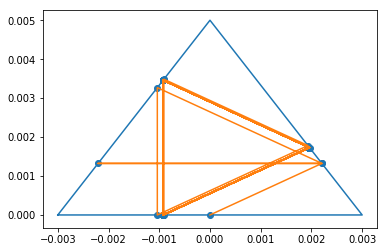

The side lengths of the outer triangle are:  0.0058309518948453   0.0058309518948453   0.006  for left, right, and bottom, respectively

The corresponding side lengths of the inner triangle are:  0.003461538461538461   0.0033640107085645965   0.0033640107085645965

The side ratios for the outer are:  0.97182531580755  and for inner are:  0.9718253158075502


In [101]:
current_point4, visited_points4 = drawTriangle(100, [0, 0], [-.003, 0], [0, .005], [0.003, 0])

fpoint1 = visited_points4[98]
fpoint2 = visited_points4[99]
fpoint3 = visited_points4[100]

pnt1 = [-.003, 0]
pnt2 = [0, .005]
pnt3 = [.003, 0]

bdist1 = dist(pnt1, pnt2)
bdist2 = dist(pnt2, pnt3)
bdist3 = dist(pnt3, pnt1)

idist1 = dist(fpoint3, fpoint1)
idist2 = dist(fpoint2, fpoint3)
idist3 = dist(fpoint1, fpoint2)

print("The side lengths of the outer triangle are: ", bdist1, " ", bdist2, " ", bdist3, " for left, right, and bottom, respectively")

print("\nThe corresponding side lengths of the inner triangle are: ", idist1, " ", idist3, " ", idist2)

print("\nThe side ratios for the outer are: ", (bdist1/bdist3), " and for inner are: ", (idist3/idist1))

In [103]:
(((math.sin(math.radians(61.9275131)))*(0.006))/(phi))

0.003271944647414934

Difference, or error or function 
$$
\frac{sin(A)*a}{\phi}
$$

doubles every time the size of the same triangle doubles.

For one, difference was $0.1895938141$, for two was $0.3791876282$, and the third was $7583752565$, and you can notice that each successive error is double the previous one exactly, which means that as the scale of the triangle is doubled, the error of the approximation formula also exactly doubled, which means we must find the constant that can close this gap.

So now we can see that the approximation is no longer an approximation, but completely correct.  So it was just off by some constant.  Lets try multiplying this constant by some other triangle and see if this is a global constant or is unique to each triangle.

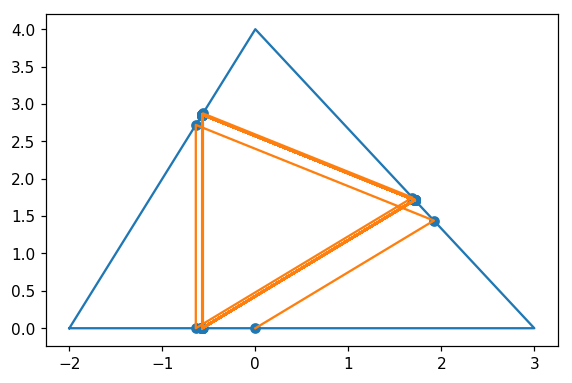

The side lengths of the outer triangle are:  4.47213595499958   5.0   5.0  for left, right, and bottom, respectively

The corresponding side lengths of the inner triangle are:  2.5555062599997598   2.8571428571428568   2.8571428571428577

The side ratios for the outer are:  0.894427190999916  and for inner are:  1.118033988749895


In [48]:
current_point4, visited_points4 = drawTriangle(100, [0, 0], [-2, 0], [0, 4], [3, 0])

fpoint1 = visited_points4[98]
fpoint2 = visited_points4[99]
fpoint3 = visited_points4[100]

pnt1 = [-2, 0]
pnt2 = [0, 4]
pnt3 = [3, 0]

bdist1 = dist(pnt1, pnt2)
bdist2 = dist(pnt2, pnt3)
bdist3 = dist(pnt3, pnt1)

idist1 = dist(fpoint3, fpoint1)
idist2 = dist(fpoint2, fpoint3)
idist3 = dist(fpoint1, fpoint2)

print("The side lengths of the outer triangle are: ", bdist1, " ", bdist2, " ", bdist3, " for left, right, and bottom, respectively")

print("\nThe corresponding side lengths of the inner triangle are: ", idist1, " ", idist3, " ", idist2)

print("\nThe side ratios for the outer are: ", (bdist1/bdist3), " and for inner are: ", (idist2/idist1))

In [116]:
(((math.sin(math.radians(63.4349747+math.pi)))*(4))/(phi))

2.2684124833704313

In [119]:
c, math.pi

(1.0579452999833967, 3.141592653589793)

So the thing to note is that for every triangle, it can be well approximated by the general formula, but is always multiplied by some constant 

The formula worked much worse for this triangle so I will need to go back to the drawing board.

### Another scalene triangle try

In [17]:
# make different shaped triangle
current_point5, visited_points5 = drawTriangle(100, [0, 0], [-3, 0], [0, 6], [2, 0])

fpoint1 = visited_points5[98]
fpoint2 = visited_points5[99]
fpoint3 = visited_points5[100]

pnt1 = [-3, 0]
pnt2 = [0, 6]
pnt3 = [2, 0]

bdist1 = dist(pnt1, pnt2)
bdist2 = dist(pnt2, pnt3)
bdist3 = dist(pnt3, pnt1)

idist1 = dist(fpoint3, fpoint1)
idist2 = dist(fpoint2, fpoint3)
idist3 = dist(fpoint1, fpoint2)

print("The side lengths of the outer triangle are: ", bdist1, " ", bdist2, " ", bdist3, " for left, right, and bottom, respectively")

print("\nThe corresponding side lengths of the inner triangle are: ", idist1, " ", idist2, " ", idist3)

print("\nThe side ratios for the outer are: ", (bdist1/bdist3)," ", (bdist1/bdist2), " and for inner are: ", (idist3/idist1), " ", (idist3/idist2), "\n\n")


mid1 = midpoint(pnt1, pnt2)
mid2 = midpoint(pnt2, pnt3)
mid3 = midpoint(pnt3, pnt1)

print(mid1, mid2, mid3)
print(dist(mid1, mid2), dist(mid2, mid3), dist(mid3, mid1))

The side lengths of the outer triangle are:  6.708203932499369   6.324555320336759   5.0  for left, right, and bottom, respectively

The corresponding side lengths of the inner triangle are:  2.7272727272727266   3.449757447456414   3.6590203268178376

The side ratios for the outer are:  1.3416407864998738   1.0606601717798212  and for inner are:  1.341640786499874   1.0606601717798212 


(-1.5, 3.0) (1.0, 3.0) (-0.5, 0.0)
2.5 3.3541019662496847 3.1622776601683795


As you can see, the inner triangle is similar to the outer one for any scalene triangle.  Now we will test the formula for approximating side lengths.

Angles 
* A = 63.4349488 °
* B = 45 °
* C = 71.5650512 °

As you can see, the angles are the same as the last scalene one we did as it is just scaled up.

In [58]:
(math.sin(math.radians(63.4349488)))*(6.324555320336759)*phi

3.4961281948912313

Still a decent approximation for scalene triangles, but of course not perfect.  The best approximation has been the first isosceles one as seen below.

In [9]:
current_point6, visited_points6 = drawTriangle(100, [0, 0], [-2, 0], [0, 3], [2, 0])

fpoint1 = visited_points6[98]
fpoint2 = visited_points6[99]
fpoint3 = visited_points6[100]

pnt1 = [-2, 0]
pnt2 = [0, 3]
pnt3 = [2, 0]

bdist1 = dist(pnt1, pnt2)
bdist2 = dist(pnt2, pnt3)
bdist3 = dist(pnt3, pnt1)

idist1 = dist(fpoint3, fpoint1)
idist2 = dist(fpoint2, fpoint3)
idist3 = dist(fpoint1, fpoint2)

print("The side lengths of the outer triangle are: ", bdist1, " ", bdist2, " ", bdist3, " for left, right, and bottom, respectively")

print("\nThe corresponding side lengths of the inner triangle are: ", idist1, " ", idist3, " ", idist2)

print("\nThe side ratios for the outer are: ", (bdist1/bdist3), " and for inner are: ", (idist3/idist1))

The side lengths of the outer triangle are:  3.605551275463989   3.605551275463989   4.0  for left, right, and bottom, respectively

The corresponding side lengths of the inner triangle are:  2.2857142857142856   2.0603150145508513   2.0603150145508513

The side ratios for the outer are:  0.9013878188659973  and for inner are:  0.9013878188659975


Angles:
* A = 56.3099325 °
* B = 56.3099325 °
* C = 67.3801351 °

In [10]:
(math.sin(math.radians(67.3801351)))*(4)*phi

2.2819716515660717

For this triangle, the formula approximates it quite well.

Now find midpoints and see if the Euclidean method makes smaller internal triangle.

In [15]:
mid1 = midpoint(pnt1, pnt2)
mid2 = midpoint(pnt2, pnt3)
mid3 = midpoint(pnt3, pnt1)
print(mid1, mid2, mid3)
print(dist(mid1, mid2), dist(mid2, mid3), dist(mid3, mid1))

(-1.0, 1.5) (1.0, 1.5) (0.0, 0.0)
2.0 1.8027756377319946 1.8027756377319946


This disproves my conjecture that the triangle in the middle is the smallest possible triangle that would fit in the middle.

In [15]:
current_point5, visited_points5 = drawTriangle(100, [0, 6], [-2, 0], [0, 6], [2, 0])

fpoint1 = visited_points5[98]
fpoint2 = visited_points5[99]
fpoint3 = visited_points5[100]

pnt1 = [-2, 0]
pnt2 = [0, 6]
pnt3 = [2, 0]

bdist1 = dist(pnt1, pnt2)
bdist2 = dist(pnt2, pnt3)
bdist3 = dist(pnt3, pnt1)

idist1 = dist(fpoint3, fpoint1)
idist2 = dist(fpoint2, fpoint3)
idist3 = dist(fpoint1, fpoint2)

print("The side lengths of the outer triangle are: ", bdist1, " ", bdist2, " ", bdist3, " for left, right, and bottom, respectively")

print("\nThe corresponding side lengths of the inner triangle are: ", idist1, " ", idist2, " ", idist3)

print("\nThe side ratios for the outer are: ", (bdist1/bdist3)," ", (bdist1/bdist2), " and for inner are: ", (idist3/idist1), " ", (idist3/idist2), "\n\n")


mid1 = midpoint(pnt1, pnt2)
mid2 = midpoint(pnt2, pnt3)
mid3 = midpoint(pnt3, pnt1)

print(mid1, mid2, mid3)
print(dist(mid1, mid2), dist(mid2, mid3), dist(mid3, mid1))

The side lengths of the outer triangle are:  6.324555320336759   6.324555320336759   4.0  for left, right, and bottom, respectively

The corresponding side lengths of the inner triangle are:  3.114089297219065   2.7518796992481205   2.5678645661517665

The side ratios for the outer are:  1.5811388300841898   1.0  and for inner are:  0.824595675032477   0.9331311128365708 


(-1.0, 3.0) (1.0, 3.0) (0.0, 0.0)
2.0 3.1622776601683795 3.1622776601683795


## Longer Fib ratio number for better approximations

In [14]:
(math.sin(math.radians(67.3801351)))*(4)*(0.61803398874989484820458683436563811772030917980576286213544862270526046281890\
244970720720418939113748475408807538689175212663386222353693179318006076672635\
443338908659593958290563832266131992829026788067520876689250171169620703222104\
321626954862629631361443814975870122034080588795445474924618569536486444924104\
432077134494704956584678850987433944221254487706647809158846074998871240076521\
705751797883416625624940758906970400028121042762177111777805315317141011704666\
599146697987317613560067087480710131795236894275219484353056783002287856997829\
778347845878228911097625003026961561700250464338243776486102838312683303724292\
675263116533924731671112115881863851331620384005222165791286675294654906811317\
159934323597349498509040947621322298101726107059611645629909816290555208524790\
352406020172799747175342777592778625619432082750513121815628551222480939471234\
145170223735805772786160086883829523045926478780178899219902707769038953219681\
986151437803149974110692608867429622675756052317277752035361393621076738937645\
560606059216589466759551900400555908950229530942312482355212212415444006470340\
565734797663972394949946584578873039623090375033993856210242369025138680414577\
995698122445747178034173126453220416397232134044449487302315417676893752103068\
737880344170093954409627955898678723209512426893557309704509595684401755519881\
921802064052905518934947592600734852282101088194644544222318891319294689622002\
301443770269923007803085261180754519288770502109684249362713592518760777884665\
836150238913493333122310533923213624319263728910670503399282265263556209029798\
642472759772565508615487543574826471814145127000602389016207773224499435308899\
909501680328112194320481964387675863314798571911397815397807476150772211750826\
945863932045652098969855567814106968372884058746103378105444390943683583581381\
131168993855576975484149144534150912954070050194775486163075422641729394680367\
319805861833918328599130396072014455950449779212076124785645916160837059498786\
006970189409886400764436170933417270919143365013715766011480381430626238051432\
117348151005590134561011800790506381421527093085880928757034505078081454588199\
063361298279814117453392731208092897279222132980642946878242748740174505540677\
875708323731097591511776297844328474790817651809778726841611763250386121129143\
683437670235037111633072586988325871033632223810980901211019899176841491751233\
134015273384383723450093478604979294599158220125810459823092552872124137043614\
910205471855496118087642657651106054588147560443178479858453973128630162544876\
114852021706440411166076695059775783257039511087823082710647893902111569103927\
683845386333321565829659773103436032322545743637204124406408882673758433953679\
593123221343732099574988946995656473600729599983912881031974263125179714143201\
231127955189477817269141589117799195648125580018455065632952859859100090862180\
297756378925999164994642819302229355234667475932695165421402109136301819472270\
789012208728736170734864999815625547281137347987165695274890081443840532748378\
137824669174442296349147081570073525457070897726754693438226195468615331209533\
579238014609273510210119190218360675097308957528957746814229543394385493155339\
630380729169175846101460995055064803679304147236572039860073550760902317312501\
613204843583648177048481810991602442523271672190189334596378608787528701739359\
303013359011237102391712659047026349402830766876743638651327106280323174069317\
334482343564531850581353108549733350759966778712449058363675413289086240632456\
395357212524261170278028656043234942837301725574405837278267996031739364013287\
627701243679831144643694767053127249241047167001382478312865650649343418039004\
101780533950587724586655755229391582397084177298337282311525692609299594224000\
056062667867435792397245408481765197343626526894488855272027477874733598353672\
776140759171205132693448375299164998093602461784426757277679001919190703805220\
461232482391326104327191684512306023627893545432461769975753689041763650254785\
138246314658336383376023577899267298863216185839590363998183845827644912459809\
370430555596137973432613483049494968681089535696348281781288625364608420339465\
381944194571426668237183949183237090857485026656803989744066210536030640026081\
711266599541993687316094572288810920778822772036366844815325617284117690979266\
665522384688311371852991921631905201568631222820715599876468423552059285371757\
807656050367731309751912239738872246825805715974457404842987807352215984266766\
257807706201943040054255015831250301753409411719101929890384472503329880245014\
367968441694795954530459103138116218704567997866366174605957000344597011352518\
134600656553520347888117414994127482641521355677639403907103870881823380680335\
003804680017480822059109684420264464021877053401003180288166441530913939481564\
031928227854824145105031888251899700748622879421558957428202166570621880905780\
880503246769912972872103870736974064356674589202586565739785608595665341070359\
978320446336346485489497663885351045527298242290699848853696828046459745762651\
434359050938321243743333870516657149005907105670248879858043718151261004403814\
880407252440616429022478227152724112085065788838712493635106806365166743222327\
767755797399270376231914704732395512060705503992088442603708790843334261838413\
597078164829553714321961189503797714630007555975379570355227144931913217255644\
012830918050450089921870512118606933573153895935079030073672702331416532042340\
155374144268715405511647961143323024854404094069114561398730260395182816803448\
252543267385759005604320245372719291248645813334416985299391357478698957986439\
498023047116967157362283912018127312916589952759919220318372356827279385637331\
265479985912463275030060592567454979435088119295056854932593553187291418011364\
121874707526281068698301357605247194455932195535961045283031488391176930119658\
583431442489489856558425083410942950277197583352244291257364938075417113739243\
760143506829878493271299751228688196049835775158771780410697131966753477194792\
263651901633977128473907933611119140899830560336106098717178305543540356089529\
290818464143713929437813560482038947912574507707557510300242072662900180904229\
342494259060666141332287226980690145994511995478016399151412612525728280664331\
261657469388195106442167387180001100421848302580916543383749236411838885646851\
431500637319042951481469424314608952547072037405566913069220990804819452975110\
650464281054177552590951871318883591476599604131796020941530858553323877253802\
327276329773721431279682167162344211832018028814127474431688472184593927814354\
740999990722332030592629766112383279833169882539312620065037028844782866694044\
730794710476125586583752986236250999823233597155072338383324408152577819336426\
263043302658958170800451278873115935587747217256494700051636672577153920984095\
032745112153687300912199629522765913163709396860727134269262315475330437993316\
581107369643142171979434056391551210810813626268885697480680601169189417502722\
987415869917914534994624441940121978586013736608286907223651477139126874209665\
137875620591854328888341742920901563133283193575622089713765630978501563154982\
456445865424792935722828750608481453351352181729587932991171003247622205219464\
510536245051298843087134443950724426735146286179918323364598369637632722575691\
597239543830520866474742381511079273494836952396479268993698324917999502789500\
060459661313463363024949951480805329017902975182515875049007435187983511836032\
722772601717404535571658855578297291061958193517105548257930709100576358699019\
297217995168731175563144485648100220014254540554292734588371160209947945720823\
780436871894480563689182580244499631878342027491015335791072733625328906933474\
123802222011626277119308544850295419132004009998655666517756640953656197897818\
380451030356510131589458902871861086905893947136801484570018366495647203294334\
374298946427412551435905843484091954870152361403173913903616440198455051049121\
169792001201999605069949664030350863692903941007019450532016234872763232732449\
439630480890554251379723314751852070910250636859816795304818100739424531700238\
804759834323450414258431406361272109602282423378228090279765960777108493915174\
887316877713522390091171173509186006546200990249758527792542781659703834950580\
106261553336910937846597710529750223173074121778344189411845965861029801877874\
274456386696612772450384586052641510304089825777754474115332076407588167751497\
553804711629667771005876646159549677692705496239398570925507027406997814084312\
496536307186653371806058742242598165307052573834541577054292162998114917508611\
311765773172095615656478695474489271320608063545779462414531066983742113798168\
963823533304477883169339728728918103664083269856988254438516675862289930696434\
684897514840879039647604203610206021717394470263487633654393195229077383616738\
981178124248365578105034169451563626043003665743108476654877780128577923645418\
522447236171374229255841593135612866371670328072171553392646325730673063910854\
108868085742838588280602303341408550390973538726134511962926415995212789311354\
431460152730902553827104325966226743903745563612286139078319433570590038148700\
898661315398195857442330441970856696722293142730741384882788975588860799738704\
470203166834856941990965480298249319817657926829855629723010682777235162740783\
807431877827318211919695280051608791572128826337968231272562870001500182929757\
729993579094919640763442861575713544427898383040454702710194580042582021202344\
580630345033658147218549203679989972935353919681213319516537974539911149424445\
183033858841290401817818821376006659284941367754317451605409387110368715211640\
405821934471204482775960541694864539878326269548013915019038995931306703186616\
706637196402569286713887146631189192685682691995276457997718278759460961617218\
868109454651578869122410609814197268619255478789926315359472922825080542516906\
814010781796021885330762305563816316401922454503257656739259976517530801427160\
714308718862859836037465057134204670083432754230277047793311183666903232885306\
873879907135900740304907459889513647687608678443238248218930617570319563803230\
819719363567274196438726258706154330729637038127515170406005057594882723856345\
156390526577104264594760405569509598408889037620799566388017861855915944111725\
092313279771138032943765475090165169496509916073833937715833230245701948347400\
070437618671998483401631826008462619656284649118225688857521346375490254180833\
821383522245258726789379505375915603579454698509102256225455003017571049469833\
483545323835260787092219304581782306012370753280678368541306584636788866433486\
249368010198782799630670259543265137806007386392908564830874157618741897345848\
450141889765293411013722158643559915527113623322003526677859159890231446163321\
026519665907632061524383747619049531582968836265042094840105654589130629827717\
249809641959472340465110419821347689354018038256954956286039244264159867485982\
280060353862839166201252826607493306196584965199979419393226017235710733642537\
083033011433624985753635970424446475998999950855041354977558585934576590926533\
307252775416758431466936767806170350120038448748838233760344077515947781221883\
070900087386627362091660799050226989270321899760379509890591085910392967345614\
610700304581921273892599269610621167643642438350141020408632149917815297968152\
237983224273753657008553469979655413859050326836160222788475547062698439108852\
103020768604706804556846560491686498860616222952323907098092629302337956482179\
981632645827888877674520846371971063478923106675469355047615197781699025881840\
407927510901824482787052505976983753514306224450902202382439823125505841623207\
188319300693606464682096595006549290109716186526367216107417136183776673327975\
626854801245657682790317603946555394523143387567730349791578588591011663748455\
675847952713918608782540104233329857442747118969610485126401975043599092076621\
558998660736837623188358845081292950114665354828171448464056865246540907815471\
619625784469575262569455165601519164029217988548909373280314651922247590030965\
715490505361043776868772619159528449204647868973473708598413845131621192972012\
634240773694545981865029659233534512568454974541129819735876670728601616056204\
230636066130281496773445797737750557564665475256322648177116997857087122831543\
104569123262503497681152452174497396136748822046480519688754341969511933120450\
216051429384844754523821270143830957855813619678302310685080845876952059053294\
683384904712099162556365034003439670828933698367423001575117385151269123066172\
276414421607512917341874714315093241924914160969998672815823859257359823894849\
274919646152272273338746312138436262116379467062032630225055489580573083750461\
299231136299173069489407342588319483999274163950984439634057635284717562762192\
786522539608720131080486406534396168875452534263098969517619019770963192258709\
342165955974471750157538376741522280570650280683143356524917199733358403064153\
550759115974264366482846628136802174505909705894602744292632222215459450758046\
571206068639904308236939693208237490767561190171561305424813311715242568478463\
363770015204417916501168232575236160495749706390822443444510351219048819830276\
001766809850965245439007199098034993026860675523879685292194732393352370086650\
221407464554037222343481675749373144640928379006539196774010355861936181566836\
616864892395554961452826472894994160615803045867891461971728155451100056660542\
499691974102798740593276434953714525167694620698597880946950174730228414275718\
871940921209137994059430370504364838600434645227993302923901865922689874992113\
256560557840142335426058951056203690720289393159204404768359276364799600596404\
860761989159298194950878786027663459905404263770045900803279434720629825445256\
356479542992488198646136171314485773469953475577155491384239289401754034139973\
846169481293479242234609743019627523013828607224496380953838401526567819764507\
588547855155492345234781646033062938842009950803260140918302574385770671025227\
243666905988908545015570754230316665924723528924702588624794887546252765727285\
151112878270673454310244515233456542284311039679528296250193698939983473961763\
988095735415260145372964681473821843600521099472119416591494716705203792255209\
633645848468041447780302164728623999264048363508773747824501638200895240322534\
379925790129265640155537754091751704419627285039126695956664877242967660367303\
453668734049079141886945214715827908157233969124039985869390855173079801955546\
128513408912061084012213617070570430060569246855916468834773320856891412679428\
448041384682813256929148160109786272696866867373917118931462269134894580427789\
899608144709524762905019260311649206867743318661546966896601822663578788750608\
856243562678932797354633904182108774638039216244772025672699596391824687788455\
497179038515839204748319903127622437066235092518775434140107112335865907748122\
063763459019884225472727655290504399502524440391136582670813300580588209460310\
208261341369127572936992893029961730892843670315238589753987388936807441526373\
794240506448764171768613552343269865728970463069180174277972173889859443284852\
057257588337563820150546720651674252681894851673328046307647813293132602893229\
366045210213189812987661526244487486693890406178469916665417485084597970146178\
215845014919572109825089234517474512254327386819725864944588083771398685065984\
085457731654169174067052111949166286337732263753475666370022120327524389997736\
006074042702972203634778048298834855189525079474605519940340110771169725644261\
005092059843362535847069597185762616776630211747878341975644501838041029203240\
408826617344339090263522350506828582854432839618480925376130820115626869907999\
117084755586982150310073563240421988569584200682439926953784403202222374628147\
659230605547476936830576549677690471159625502474507809624837449908025613750915\
622359081010534493941774294277091445166668700415228544638076615351141556487854\
936011387473103828773313388391709646174829063156788065182761765798535021665998\
607464012674884121130098549938337106031962506702797524310119377335548537011694\
674858888363080333287739571656275340367272180705622562326374148833499289970258\
977299224036941750743427314194157432466794578586039894075097356363688815672159\
676354380665593938934382075984061216064317664421902677773799145579945031468708\
716266226524133590569928494006372744908821635242948022566330458553636337251762\
049074624062938962390622030424872688432377631733574205753997574373508409657792\
180880089420590662572782307692788656445563758012667280952527379828030076636976\
928164844651277473822397061738567507146692748220374881122563994075227626464994\
658463674019559973702838393119884822335539964978333165008467491254522956512409\
390963784095416901234675375280139080830863022653352387069273071984654649454979\
101134287154636695543437462154391886526085366974366530588562164411648068912837\
357794341530609478457270987037976921346205969538843826760827659181773627669918\
727803754219954172428335791064520613736884708545165822193158645377018313401818\
827251099922917614711860529176551422881123566217241692680620648845317615164272\
953585798375412375876100415475805595730122459276711895277333823356043374201321\
392804317053379463646428351993014576706491847707768959885421647973371769625943\
938648074893633201098893643528324494132569317438323509258286421276209473432879\
984387198291625035886368857440896091619767553023636147840186271827708891360398\
933077293060296717760258418030133475474406093218222662077059842476082637941388\
598601935208959821941885723823714271930349354518240112671046073097412681279072\
726438685681544729144826761389945092064098792647692574698812334642995267308237\
405720406143748700867048612599590178424976845844736824827947824753176338174814\
799571031203396345226743415123722322454626546328353564246627786460839872179127\
843089641636422237152822199860850600158245169478318926060165827491142774933502\
865503727691068107557826463340399219222602208590967841860013859653877265826244\
657597694069240541804444738471607901449743018055889337623761296918229234768453\
759556468421122698731637506249971182291485689604472527760093934343558339195165\
132985623645893149101860849683480338090932736261062054795970421298669883573560\
404347128399801249802209466851093490407878450102117684276345079137687609746900\
665759683043519266676563960922648845670212850744821184836102907689196493402300\
641753173483914758916672023069245347107627719792524997328576890388680141780313\
799483651089527220946591304506656658258539174690486872649902546765966599164547\
365134259755577397348506528439977384490513905829430130008366961455669748537793\
407881277215791487210719258869089277878732982982214574233273265987982756950898\
845306240223036486347722967056524127035887830281940074980575439016285786745531\
327197652607107643153112391526077219362144346096089758726934223674331613718574\
577608117751518069662104795585140130069701845007026290479492570837120175279378\
554957627391245587148332010170361840521636818017341425089806160634676330850504\
184585816629334093479199103685913053789482158651701181210113330006695775232786\
685518078256752836149494920745837336845813691407977595925267273966423478746614\
399819648081036705066005238269165055144634711116867428177319502560642951637959\
659475644987891461446925936629309364804816174059808214254340525211371332408113\
913579971622858101419103410460569290782498956214560041045692221416830893236662\
517618696271719453854998551484275173369241202680159928083201458300754484742331\
264387808478085056104304909999364345905195187494843696772757473359670883349609\
157447435750398602016397666114276536952670441155200193914842934601015129531174\
458876483070371677396154265591399083037577663021309908712719887069032930470124\
105861506399852998141757804303480803588203202011047607004755710169423412034108\
915643947825303164593730437558194686752534953230130276782353560116641311177996\
099793662043449569683547930754311327558643189731515171064432189249793277801264\
964764475467078165807406131259375271847408816115479818307816751047809291413954\
564631160581269051753953556915775580410671981231638405277556052272223764711883\
233223099585068971018717504781906533494858423259762256575841898529144717833517\
322602985786292943465056366932162627673816245957417932698892327220666636081992\
490988831468529940991386734446049670842442978243630232938910355965601739942201\
988690257245471401633009612146187208365108688185334060622017099515827070442337\
042180176696349133695996064322005328873494893135966030424380804565944743335678\
316727037296363675942169993795216709569239605768464124347542886216245149157793\
040476753348053033153307521541526385710525422090937728732169921993755078088729\
411025976039372079494630773816321627677758231545511712133606496443134498613014\
698318686111929868996577503784519451854724162206976130886307000710449638898858\
341033555502859580220113658542705557765562668931284762149536288307592916507067\
735066925352644695336056301100688585609305533142306464911577431203418266408784\
648989833436453569414451359565299946353194873235833654149912091860340699657865\
139372140627836385084775887199350057479097575575821175405351435523866639331618\
523705204967991251182676180080717649555661886440043165185901961567355270606851\
436442192137316100204985388311981864969315190493719216273102798831337759268776\
002675993022444055363142019164277411901370175415170402452994379515292362166695\
619231382936999237019398531726989373859914221290389848610849267471382592106802\
650550676862778123345733959989844690818355080097898838050307572662908675028309\
257586145638783656294981053573592917496461623137707802996548502550264310977934\
737337524379483252699651218500997055530858400309861246730432929767608197353492\
136895008495286646640838728286016708683549765123021169308056436872386411643645\
448955160189710984522491878379890966570195078344359051912278712755757733414151\
965739899834250985394949988141243867834464873827376170542306270476547318264631\
092291393359618691179772831791867789266428054498091940593562998414835665844886\
741681797338164265740108940859491300072021588718078252254566398621813980490305\
216416264740583335375040007401944822542799937106484915540517805980677612154774\
199779863715955202827504416259521370231996415590408422945370845053182339069574\
228180267420934592943172176664705528067554152692935177725126373997210446455205\
841575750464849453827350764901238368245042240627692293459944117496893475532632\
823427014968216980654553172552398001772054307127018595684369569896821609274381\
477524861268071826303308720453858655587689811222175453630040489748768999958305\
726483427590138858476503981930580029789904414320737977684158031959270878986203\
686850567428253092616139905181459089956386311375579715072615294130317445492402\
147964746006967031278643019018820326716298212114252367320903055760369513934774\
922721962527524190979265435827058619143826236169596554570620436214536914822593\
105671368762112020418219967004586305486471435319876530196330777690285679543242\
031748695423978897102466863258735101760481858925973866441814562327799457300954\
367413841317476805534437990136455326858247674930722202900176242045728990633288\
539907851099363098353777693682699124705280123778232411442696591393016391555798\
526705894127926299499436463694470124952235021746832175888475755348746313185164\
231799127100671136990144220424064070263374666063079096224489100129522953604036\
686289554466354237554841828524675610324706812483024928725253862445798579719593\
410540608705628706044299291933374984302929767568868612774974045445966764907689\
233866190175323317470499841583977555955451466511472508792000876600354880200354\
341610020305183536055028738150423024888224201947289340717085805566897943195571\
575730871119751374639571086211214874072275776032636482665098692074832278093537\
135164020890698676221406470136823982545108075317711863228682727633783528212174\
155204433402435700820641554371716349645643195200892645976028414305198296988235\
695119621048155662297295589421312543515213365886532922224290456208850741610776\
952764618857286629967391241027920346745904411550242722281550897848925808723123\
074856341281625659723015778555980028113681066356892739709682211691075159919634\
387328632629201508717133440668793907974147464307979333080873035698719317899381\
257885830615761983975641743625647621763309874170588059999652801469172287371518\
094117880206138274965442896592604996471821958296214671212080939644348004070447\
124162488767823158200105878565032378099290417553718057489140300242884391770346\
048989829471082770577892817470121245176253190918409307162964622812236802973323\
666124435869331175169666347680294629208522034563496792889670439307806791537848\
750850066089974053287840422088610933543981332125812323083611244408211512816512\
732499175306407958978872018917220734679395032969131268824194215802460569242870\
178218489689038094097461603250984979561010673833099080031030610623273280719103\
933857898803653226331288587588493359764699655904785345917976519080139726545812\
480950502874279621264289206096715928928596662751911845516371261980516927830644\
753500367390898138711962711507442635682622434301099632308185211282094860540532\
706943313655028782325012426696091909913326994373707341321077502051446264702381\
406223012585495214299304768475022588429094465242471206017272772932505883443651\
104529738473935942072626852387931086829030809655595590134562395542392852379311\
884025935005253481534222953347803554559778610086985318133062573910363923537390\
428356586131351283884522733674984196822550243685114937855272452177655956877624\
099053026256134408103683695435680852395523052628815095052507171773415550313877\
639119316720661902999244435131761416014843172628442837738319446899863061749834\
282402161930271425770576768541237158716334527693451990427356693545040375254639\
050787477825025408285191161819606119006659792959080766107210732529588732418057\
039430458592909920364514194752283577743102434837076492814142717099190128094188\
185144575359600878748052621212289966216277729848620201718774883691046302905667\
411677038849683178663211535119560453439860540202932233471619702890985446017052\
830982478177434296395989471138710305617435238267320650123792262353793696725252\
438626128226858048556769046513841492021753359156153240673679682599281376318084\
871440477118608697819703027671908010427058033918425787150417682388147490773175\
287953555058238774984179040090396562488354393310516827264160271674603139440215\
805186047972510074232810448465132126640074148806984200355166266846933269740692\
202640373506831721298994362375926499655227680229389812003725734159634256354158\
741219975987773579751423646751659964273643626108410171855266867978017425340041\
413187665416284844621550331942326302128117480852834127160417563426297896186359\
214732873873672694203634052596734138811832703362713913014107777287016256407669\
394276622830711711846242982728723021470267633538891167017193105043928258310537\
830524953904031758742939935394060558147511014286932645500797977023089784096414\
561911257188068645805256159634380324878116399174282037733688479355234881707888\
370098132337842673385415646164450171390384335952382039527899069566158301776853\
193821776129633949579923032979482333075571171457733545429404818067652516223171\
252457438333367744887838869525767143577591055712194136166155408115021128930500\
154964397564959583716953040005798235925948481313394223107417643490492590439641\
988997339959250424052794418453135072420266145400256336790234518361886727697290\
529885440012309435209845278594333382772208025665227845382614199424900507497393\
470549069398624053307361720832480251672370005674945925863234852428631673708949\
656027554570443573407126287237246101565716669486628658233896757493447439056857\
711282562329844093126286339122564725522333620075830814575611475823947498904444\
603437982518749703249992081428801157378733772198329275743967801910329116475707\
903909190179844972963905018286179464372109227030337865606750951106786967420881\
963441994477648892305324369902046628754616797189374920853292157425000612844800\
774281587438224317401256447668064171875578517823939138551137344891967236829604)

2.2819716515660717


## Bugs
This program is still very buggy. Below are some of the issues:
* The horizontal line sometimes drawn
* Right triangles do not work as get division by 0